In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.datasets import load_digits

from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()
display(digits.target)
display(digits.data)
print(digits.DESCR)

array([0, 1, 2, ..., 8, 9, 8])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
display(digits.target)
y = digits.target == 9
display(y)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

array([0, 1, 2, ..., 8, 9, 8])

array([False, False, False, ..., False,  True, False])

In [4]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Прогнозируемые метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Прогнозируемые метки: [False]
Правильность на тестовом наборе: 0.90


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))


Test score: 0.92


In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

logreg score: 0.98


F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Матрица ошибок

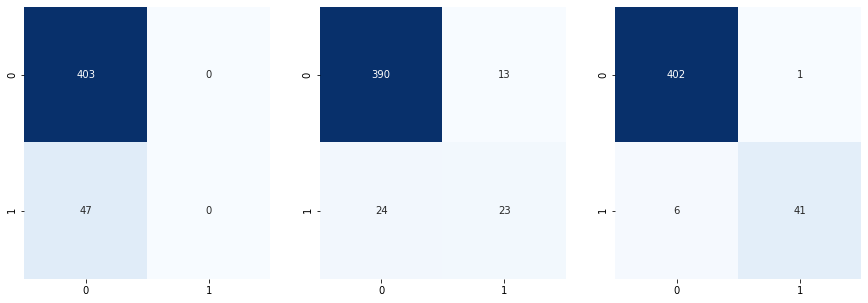

In [7]:
from sklearn.metrics import confusion_matrix

matrix_1=confusion_matrix(y_test,pred_most_frequent)
matrix_2=confusion_matrix(y_test,pred_tree)
matrix_3=confusion_matrix(y_test,pred_logreg)

fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 3, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 2)
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");
ax = plt.subplot(1, 3, 3)
sns.heatmap(matrix_3,annot=True, fmt='g', cbar=None,cmap="Blues");

In [8]:
display(matrix_1)
display(matrix_2)
display(matrix_3)

array([[403,   0],
       [ 47,   0]], dtype=int64)

array([[390,  13],
       [ 24,  23]], dtype=int64)

array([[402,   1],
       [  6,  41]], dtype=int64)

### Метрики

In [9]:
from sklearn.metrics import f1_score
print("f1 score наибольшая частота: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score логистическая регрессия: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score наибольшая частота: 0.00
f1 score дерево: 0.55
f1 score логистическая регрессия: 0.92


In [10]:
from sklearn.metrics import classification_report
print('--------- Дерево ------------')
print(classification_report(y_test, pred_tree,
                            target_names=["НЕ девять", "Девять"]))
print(' ')
print('--------- Лог. регрессия ------------')
print(classification_report(y_test, pred_logreg,
                            target_names=["НЕ девять", "Девять"]))

--------- Дерево ------------
              precision    recall  f1-score   support

   НЕ девять       0.94      0.97      0.95       403
      Девять       0.64      0.49      0.55        47

    accuracy                           0.92       450
   macro avg       0.79      0.73      0.75       450
weighted avg       0.91      0.92      0.91       450

 
--------- Лог. регрессия ------------
              precision    recall  f1-score   support

   НЕ девять       0.99      1.00      0.99       403
      Девять       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



### Кривая точность-полнота

F:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


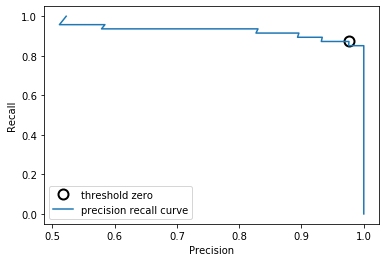

In [11]:
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
reg = LogisticRegression(C=0.1).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(
    y_test, reg.decision_function(X_test))

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [12]:
thresholds

array([-4.90496762, -4.78230032, -4.68876892, -4.53503955, -4.51671176,
       -4.50179696, -4.41992311, -4.18314127, -4.12450455, -4.07553953,
       -4.00481778, -3.75749485, -3.72106508, -3.64923536, -3.62114631,
       -3.59277399, -3.47764865, -3.42763584, -3.35694017, -3.27412772,
       -3.27332867, -3.14188882, -2.94820888, -2.94259334, -2.88034631,
       -2.86547419, -2.79931118, -2.62200618, -2.60870326, -2.56843714,
       -2.56032908, -2.47791878, -2.43072124, -2.2949403 , -2.27474057,
       -2.21254762, -1.96165787, -1.8401394 , -1.83835605, -1.61344851,
       -1.55079822, -1.40860164, -1.20913721, -1.10692189, -1.07462983,
       -0.9455003 , -0.76822601, -0.76628754,  0.16430313,  1.03382308,
        1.06123413,  1.40204128,  2.20448958,  2.25821307,  2.2779678 ,
        2.47852704,  2.66633114,  2.80005831,  2.95514856,  2.98081334,
        3.18358606,  3.47615425,  3.62408237,  3.66612824,  3.68577684,
        4.27715932,  4.91982474,  5.04922209,  5.24287882,  5.40

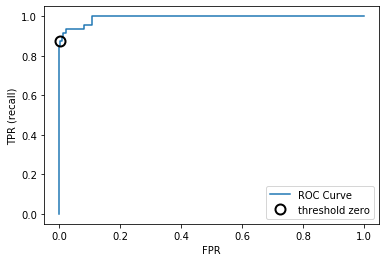

In [13]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, reg.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.10  accuracy = 0.90  AUC = 0.96
gamma = 0.01  accuracy = 0.90  AUC = 1.00


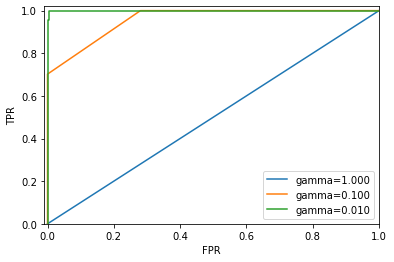

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")